Saving diabetes_dataset.csv to diabetes_dataset.csv
['Unnamed: 0', 'Age', 'Sex', 'Ethnicity', 'BMI', 'Waist_Circumference', 'Fasting_Blood_Glucose', 'HbA1c', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Cholesterol_Total', 'Cholesterol_HDL', 'Cholesterol_LDL', 'GGT', 'Serum_Urate', 'Physical_Activity_Level', 'Dietary_Intake_Calories', 'Alcohol_Consumption', 'Smoking_Status', 'Family_History_of_Diabetes', 'Previous_Gestational_Diabetes']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


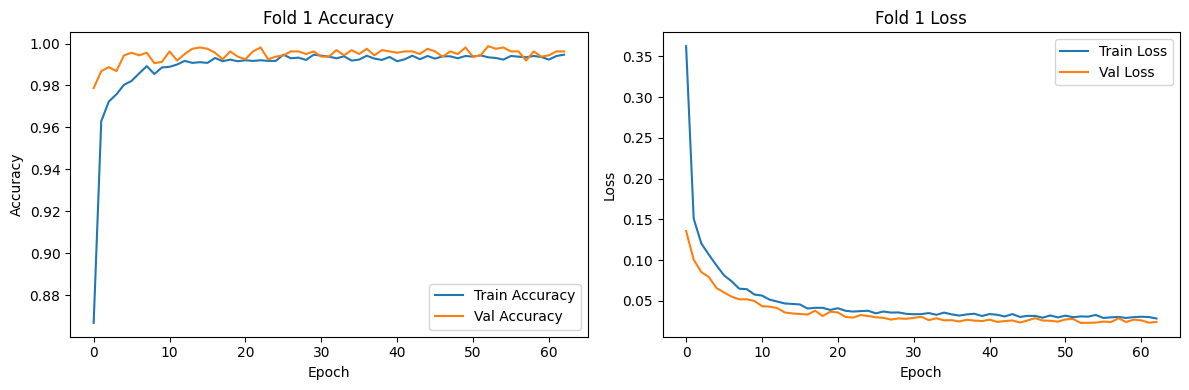

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


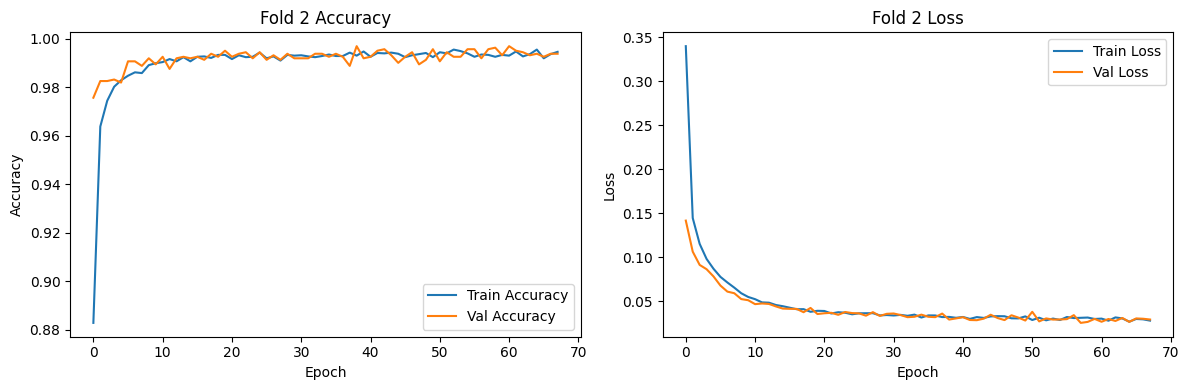

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


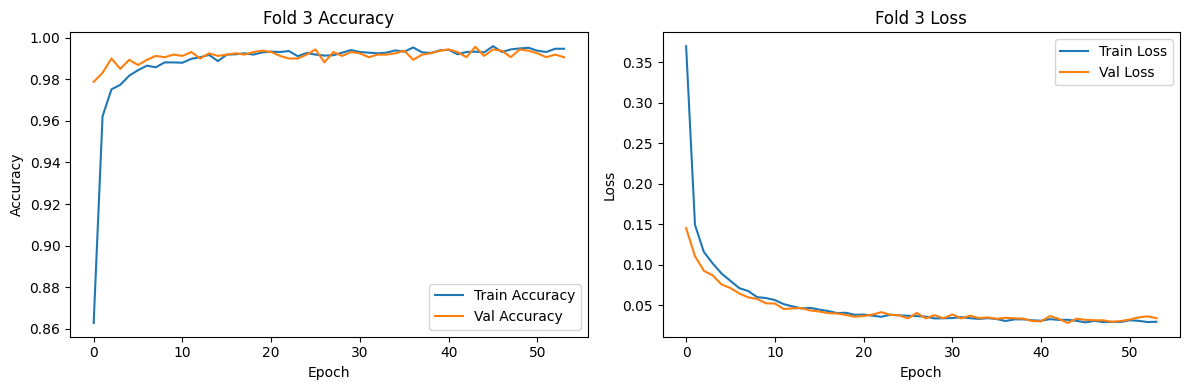

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


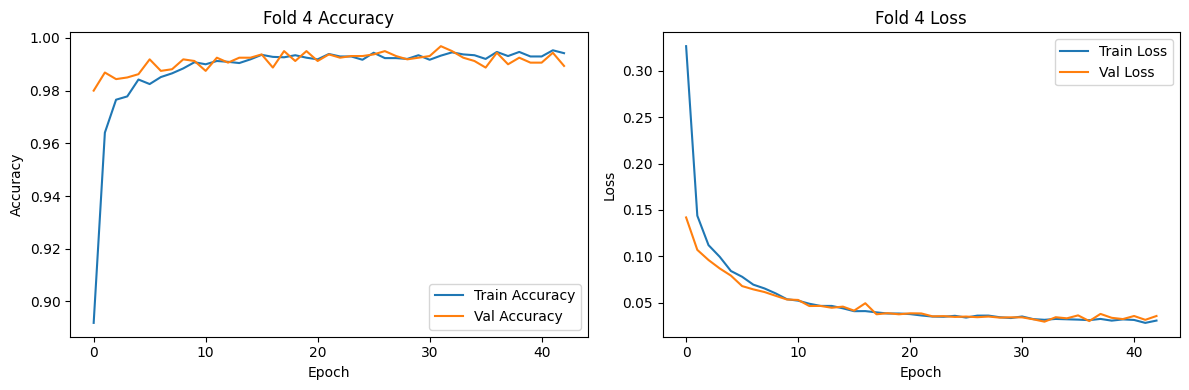

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


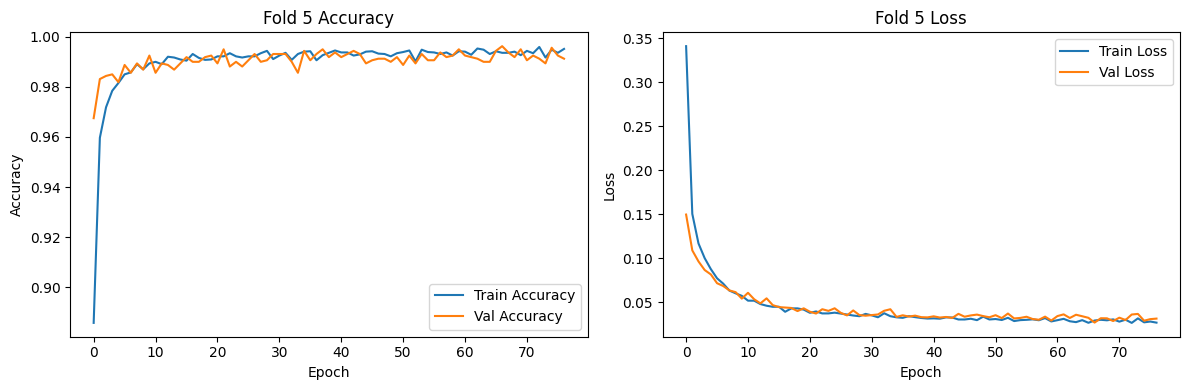

Cross-validation results:
Accuracy: 0.9963
Precision: 0.9963
Recall: 0.9971
F1: 0.9967


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Test Set Evaluation:
Accuracy:  0.9940
Precision: 0.9973
Recall:    0.9921
F1 Score:  0.9947


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('diabetes_dataset.csv')

print(df.columns.tolist())


# Select features and target
df['Diabetes'] = (df['Fasting_Blood_Glucose'] >= 126).astype(int)

numerical_features = [
    'Age', 'BMI', 'Waist_Circumference', 'Fasting_Blood_Glucose', 'HbA1c',
    'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Cholesterol_Total',
    'Cholesterol_HDL', 'Cholesterol_LDL', 'GGT', 'Serum_Urate', 'Dietary_Intake_Calories',
    'Family_History_of_Diabetes', 'Previous_Gestational_Diabetes'
]
X = df[numerical_features]
y = df['Diabetes']

# Now scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Define function to build the model
def build_model(input_dim, learning_rate=0.001, l2_penalty=0.001, dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim, kernel_regularizer=l2(l2_penalty)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(l2_penalty)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Plotting function
def plot_history(history, fold):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'Fold {fold} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'Fold {fold} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_metrics = {
    'accuracy': [], 'precision': [], 'recall': [], 'f1': []
}

for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train), 1):
    X_cv_train, X_cv_val = X_train[train_index], X_train[val_index]
    y_cv_train, y_cv_val = y_train.iloc[train_index], y_train.iloc[val_index]

    model = build_model(X_cv_train.shape[1])
    es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Early stopping to prevent overfitting

    history = model.fit(
        X_cv_train, y_cv_train,
        epochs=100, batch_size=16,
        validation_data=(X_cv_val, y_cv_val),
        verbose=0, callbacks=[es]
    )

# Predict and evaluate
    y_pred = (model.predict(X_cv_val) > 0.5).astype(int)

    cv_metrics['accuracy'].append(accuracy_score(y_cv_val, y_pred))
    cv_metrics['precision'].append(precision_score(y_cv_val, y_pred))
    cv_metrics['recall'].append(recall_score(y_cv_val, y_pred))
    cv_metrics['f1'].append(f1_score(y_cv_val, y_pred))

    # Plot for this fold
    plot_history(history, fold)

# Print average CV metrics
print("Cross-validation results:")
for metric in cv_metrics:
    print(f"{metric.capitalize()}: {np.mean(cv_metrics[metric]):.4f}")

# Final model on full training set
final_model = build_model(X_train.shape[1])
final_model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

# Final test evaluation
y_test_pred = (final_model.predict(X_test) > 0.5).astype("int32")
print("\nTest Set Evaluation:")
print(f"Accuracy:  {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_test_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_test_pred):.4f}")

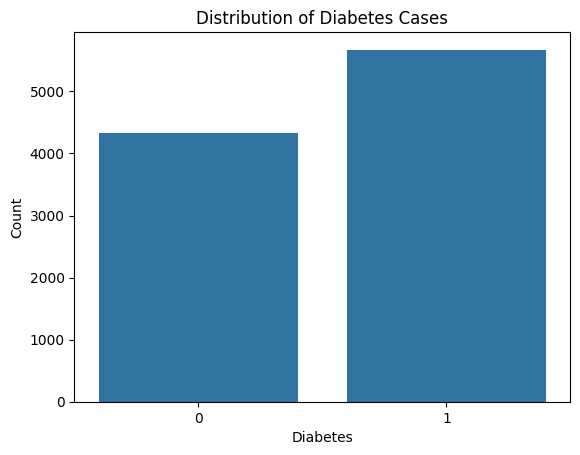

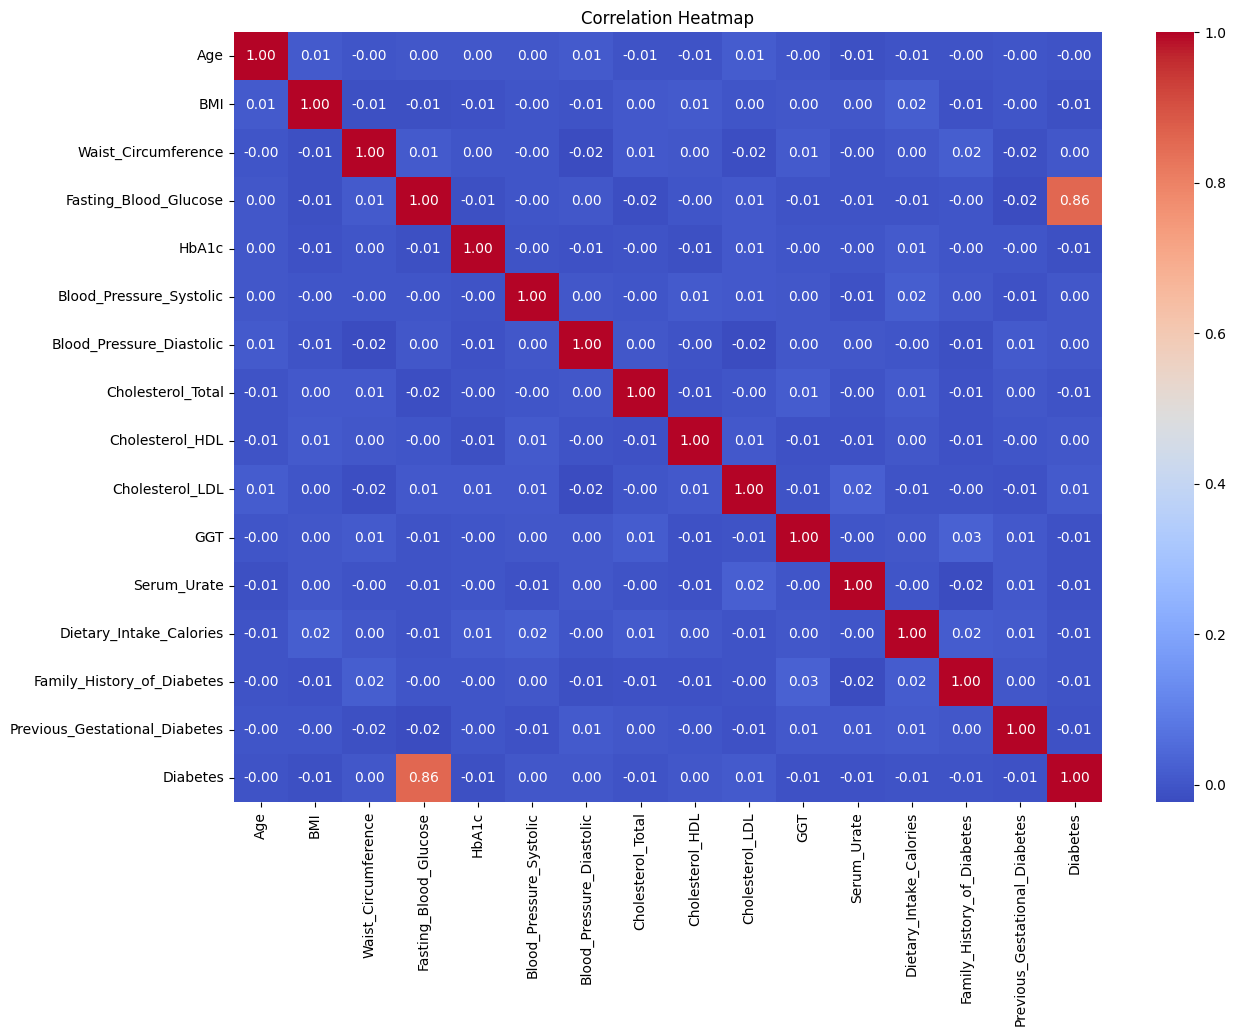

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


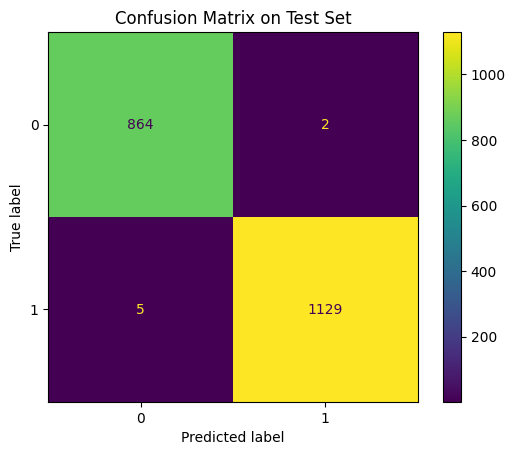

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step


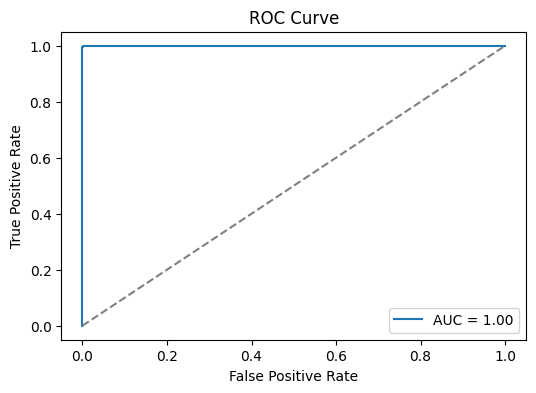

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Diabetes', data=df)
plt.title('Distribution of Diabetes Cases')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(14,10))
sns.heatmap(df[numerical_features + ['Diabetes']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Final model training (on all of X_train)
final_model = build_model(X_train.shape[1])
final_model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

# Predict and evaluate
y_test_pred = (final_model.predict(X_test) > 0.5).astype(int)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix on Test Set')
plt.show()

from sklearn.metrics import roc_curve, auc

y_probs = final_model.predict(X_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
